In [1]:
import os
import numpy as np
import tensorflow as tf

from data import load_cifar10, shuffle, split, normalize, dense_to_one_hot
from classification_cnn2 import ClassificationCNN2
from visualization import draw_conv_filters, draw_image

In [2]:
DATA_DIR = 'D:\datasets\cifar-10-batches-py'
SAVE_DIR = os.path.join(
    os.path.dirname(os.path.realpath('__file__')), "out/cifar10")
os.makedirs(SAVE_DIR, exist_ok=True)

class_count = 10
print("Loading data...")
train_x, train_y, test_x, test_y = load_cifar10(DATA_DIR)
print("Preparing data...")
valid_size = 5000
train_x, train_y = shuffle(train_x, train_y)
valid_x, valid_y, train_x, train_y = split(train_x, train_y, valid_size)
train_x, valid_x, test_x, mean, std = normalize(
    train_x, valid_x, test_x, returnmeanstd=True)
ys = [train_y, valid_y, test_y]
train_y, valid_y, test_y = [dense_to_one_hot(y, class_count) for y in ys]

Loading data...
Preparing data...


In [3]:
tf.reset_default_graph()
print("Preparing CNN...")
nn = ClassificationCNN2(
    train_x[0].shape,
    num_classes=class_count,
    weight_decay=0.01,
    ortho_penalty=0.05,
    lr_policy={
        'boundaries': [3, 5, 7],
        'values': [10**-i for i in range(1, 5)]
    },
    batch_size=50,
    max_epochs=8,
    save_dir=SAVE_DIR)

conv1_var = tf.contrib.framework.get_variables('convrelu1/weights:0')[0]
conv1_weights = conv1_var.eval(session=nn.sess)
draw_conv_filters(0, 0, conv1_weights, SAVE_DIR)

train_losses, train_accuracies = [], []
valid_losses, valid_accuracies = [], []
learning_rates = []


def epoch_callback(evaluation):
    valid_loss, _, valid_accuracy, _, _ = evaluation
    train_loss, _, train_accuracy, _, _ = nn.evaluate("Training", train_x,
                                                      train_y)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    valid_losses.append(valid_loss)
    valid_accuracies.append(valid_accuracy)
    learning_rates.append(nn.sess.run(nn.n.learning_rate))

Preparing CNN...
(?,) (?,) (?, 10)


C:\Users\Ivan\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [4]:
print("Training...")
#train_x = train_x[:1000]
#train_y = train_y[:1000]
nn.train(train_x, train_y, valid_x, valid_y, epoch_callback=epoch_callback)
print("Testing...")
nn.evaluate("Test", test_x, test_y)

Training...

Running evaluation:  Validation


D:\Projekti\du-lab\lab2\evaluation.py:12: RuntimeWarning: invalid value encountered in true_divide
  recalls = tps / np.sum(cm, axis=0)
C:\Users\Ivan\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


Validation avg loss = 19.24

Validation accuracy = 0.10
Validation cm = {}
epoch 1, step 0/45000, batch loss = 19.18
epoch 1, step 250/45000, batch loss = 12.73
epoch 1, step 500/45000, batch loss = 10.19
epoch 1, step 750/45000, batch loss = 9.13
epoch 1, step 1000/45000, batch loss = 8.58
epoch 1, step 1250/45000, batch loss = 8.20
epoch 1, step 1500/45000, batch loss = 7.90
epoch 1, step 1750/45000, batch loss = 7.75
epoch 1, step 2000/45000, batch loss = 7.57
epoch 1, step 2250/45000, batch loss = 7.33
epoch 1, step 2500/45000, batch loss = 7.28
Train accuracy = 12.86
epoch 1, step 2750/45000, batch loss = 7.13
epoch 1, step 3000/45000, batch loss = 7.05
epoch 1, step 3250/45000, batch loss = 6.99
epoch 1, step 3500/45000, batch loss = 6.74
epoch 1, step 3750/45000, batch loss = 6.71
epoch 1, step 4000/45000, batch loss = 6.94
epoch 1, step 4250/45000, batch loss = 6.61
epoch 1, step 4500/45000, batch loss = 6.51
epoch 1, step 4750/45000, batch loss = 6.47
epoch 1, step 5000/45000,

epoch 1, step 43250/45000, batch loss = 2.52
epoch 1, step 43500/45000, batch loss = 2.57
epoch 1, step 43750/45000, batch loss = 2.33
epoch 1, step 44000/45000, batch loss = 2.71
epoch 1, step 44250/45000, batch loss = 2.50
epoch 1, step 44500/45000, batch loss = 2.66
epoch 1, step 44750/45000, batch loss = 2.39
Train accuracy = 38.53

Running evaluation:  Validation
Validation avg loss = 2.40

Validation accuracy = 0.49
Validation cm = {}

Running evaluation:  Training
Training avg loss = 2.37

Training accuracy = 0.51
Training cm = {}
epoch 2, step 0/45000, batch loss = 2.40
epoch 2, step 250/45000, batch loss = 2.74
epoch 2, step 500/45000, batch loss = 2.42
epoch 2, step 750/45000, batch loss = 2.19
epoch 2, step 1000/45000, batch loss = 2.43
epoch 2, step 1250/45000, batch loss = 2.65
epoch 2, step 1500/45000, batch loss = 2.02
epoch 2, step 1750/45000, batch loss = 2.08
epoch 2, step 2000/45000, batch loss = 2.84
epoch 2, step 2250/45000, batch loss = 2.67
epoch 2, step 2500/450

epoch 2, step 40750/45000, batch loss = 1.66
epoch 2, step 41000/45000, batch loss = 1.58
epoch 2, step 41250/45000, batch loss = 1.84
epoch 2, step 41500/45000, batch loss = 1.72
epoch 2, step 41750/45000, batch loss = 1.70
epoch 2, step 42000/45000, batch loss = 1.63
epoch 2, step 42250/45000, batch loss = 1.93
epoch 2, step 42500/45000, batch loss = 2.01
Train accuracy = 50.09
epoch 2, step 42750/45000, batch loss = 1.61
epoch 2, step 43000/45000, batch loss = 2.31
epoch 2, step 43250/45000, batch loss = 1.86
epoch 2, step 43500/45000, batch loss = 1.84
epoch 2, step 43750/45000, batch loss = 1.66
epoch 2, step 44000/45000, batch loss = 1.84
epoch 2, step 44250/45000, batch loss = 1.49
epoch 2, step 44500/45000, batch loss = 1.90
epoch 2, step 44750/45000, batch loss = 1.48
Train accuracy = 50.09

Running evaluation:  Validation
Validation avg loss = 1.81

Validation accuracy = 0.48
Validation cm = {}

Running evaluation:  Training
Training avg loss = 1.76

Training accuracy = 0.51


epoch 3, step 38250/45000, batch loss = 1.41
epoch 3, step 38500/45000, batch loss = 1.29
epoch 3, step 38750/45000, batch loss = 1.29
epoch 3, step 39000/45000, batch loss = 1.33
epoch 3, step 39250/45000, batch loss = 1.30
epoch 3, step 39500/45000, batch loss = 1.23
epoch 3, step 39750/45000, batch loss = 1.42
epoch 3, step 40000/45000, batch loss = 1.39
Train accuracy = 62.44
epoch 3, step 40250/45000, batch loss = 1.29
epoch 3, step 40500/45000, batch loss = 1.45
epoch 3, step 40750/45000, batch loss = 1.51
epoch 3, step 41000/45000, batch loss = 1.48
epoch 3, step 41250/45000, batch loss = 1.19
epoch 3, step 41500/45000, batch loss = 1.34
epoch 3, step 41750/45000, batch loss = 1.57
epoch 3, step 42000/45000, batch loss = 1.55
epoch 3, step 42250/45000, batch loss = 1.18
epoch 3, step 42500/45000, batch loss = 1.29
Train accuracy = 62.49
epoch 3, step 42750/45000, batch loss = 1.41
epoch 3, step 43000/45000, batch loss = 1.27
epoch 3, step 43250/45000, batch loss = 1.40
epoch 3, 

epoch 4, step 35750/45000, batch loss = 1.25
epoch 4, step 36000/45000, batch loss = 1.12
epoch 4, step 36250/45000, batch loss = 1.08
epoch 4, step 36500/45000, batch loss = 1.16
epoch 4, step 36750/45000, batch loss = 1.34
epoch 4, step 37000/45000, batch loss = 1.29
epoch 4, step 37250/45000, batch loss = 1.21
epoch 4, step 37500/45000, batch loss = 1.19
Train accuracy = 65.25
epoch 4, step 37750/45000, batch loss = 1.33
epoch 4, step 38000/45000, batch loss = 0.97
epoch 4, step 38250/45000, batch loss = 1.19
epoch 4, step 38500/45000, batch loss = 1.10
epoch 4, step 38750/45000, batch loss = 1.38
epoch 4, step 39000/45000, batch loss = 1.21
epoch 4, step 39250/45000, batch loss = 1.04
epoch 4, step 39500/45000, batch loss = 1.21
epoch 4, step 39750/45000, batch loss = 1.14
epoch 4, step 40000/45000, batch loss = 1.21
Train accuracy = 65.35
epoch 4, step 40250/45000, batch loss = 1.35
epoch 4, step 40500/45000, batch loss = 1.12
epoch 4, step 40750/45000, batch loss = 1.10
epoch 4, 

epoch 5, step 33250/45000, batch loss = 1.07
epoch 5, step 33500/45000, batch loss = 1.32
epoch 5, step 33750/45000, batch loss = 1.12
epoch 5, step 34000/45000, batch loss = 1.32
epoch 5, step 34250/45000, batch loss = 1.17
epoch 5, step 34500/45000, batch loss = 1.30
epoch 5, step 34750/45000, batch loss = 1.18
epoch 5, step 35000/45000, batch loss = 1.74
Train accuracy = 67.87
epoch 5, step 35250/45000, batch loss = 1.16
epoch 5, step 35500/45000, batch loss = 1.28
epoch 5, step 35750/45000, batch loss = 1.10
epoch 5, step 36000/45000, batch loss = 1.33
epoch 5, step 36250/45000, batch loss = 1.24
epoch 5, step 36500/45000, batch loss = 1.27
epoch 5, step 36750/45000, batch loss = 1.17
epoch 5, step 37000/45000, batch loss = 1.17
epoch 5, step 37250/45000, batch loss = 1.30
epoch 5, step 37500/45000, batch loss = 1.27
Train accuracy = 67.77
epoch 5, step 37750/45000, batch loss = 1.29
epoch 5, step 38000/45000, batch loss = 1.04
epoch 5, step 38250/45000, batch loss = 1.03
epoch 5, 

epoch 6, step 30750/45000, batch loss = 1.41
epoch 6, step 31000/45000, batch loss = 1.27
epoch 6, step 31250/45000, batch loss = 0.99
epoch 6, step 31500/45000, batch loss = 1.21
epoch 6, step 31750/45000, batch loss = 1.19
epoch 6, step 32000/45000, batch loss = 1.34
epoch 6, step 32250/45000, batch loss = 1.25
epoch 6, step 32500/45000, batch loss = 1.11
Train accuracy = 68.27
epoch 6, step 32750/45000, batch loss = 1.13
epoch 6, step 33000/45000, batch loss = 1.31
epoch 6, step 33250/45000, batch loss = 1.26
epoch 6, step 33500/45000, batch loss = 1.26
epoch 6, step 33750/45000, batch loss = 1.05
epoch 6, step 34000/45000, batch loss = 1.07
epoch 6, step 34250/45000, batch loss = 1.14
epoch 6, step 34500/45000, batch loss = 0.89
epoch 6, step 34750/45000, batch loss = 1.29
epoch 6, step 35000/45000, batch loss = 1.21
Train accuracy = 68.28
epoch 6, step 35250/45000, batch loss = 1.39
epoch 6, step 35500/45000, batch loss = 1.21
epoch 6, step 35750/45000, batch loss = 1.23
epoch 6, 

epoch 7, step 28250/45000, batch loss = 1.03
epoch 7, step 28500/45000, batch loss = 1.21
epoch 7, step 28750/45000, batch loss = 1.32
epoch 7, step 29000/45000, batch loss = 0.94
epoch 7, step 29250/45000, batch loss = 1.15
epoch 7, step 29500/45000, batch loss = 1.32
epoch 7, step 29750/45000, batch loss = 1.08
epoch 7, step 30000/45000, batch loss = 1.22
Train accuracy = 68.53
epoch 7, step 30250/45000, batch loss = 1.19
epoch 7, step 30500/45000, batch loss = 1.28
epoch 7, step 30750/45000, batch loss = 1.22
epoch 7, step 31000/45000, batch loss = 1.26
epoch 7, step 31250/45000, batch loss = 1.09
epoch 7, step 31500/45000, batch loss = 0.93
epoch 7, step 31750/45000, batch loss = 1.23
epoch 7, step 32000/45000, batch loss = 1.42
epoch 7, step 32250/45000, batch loss = 1.22
epoch 7, step 32500/45000, batch loss = 1.12
Train accuracy = 68.51
epoch 7, step 32750/45000, batch loss = 1.08
epoch 7, step 33000/45000, batch loss = 1.32
epoch 7, step 33250/45000, batch loss = 1.11
epoch 7, 

epoch 8, step 25750/45000, batch loss = 1.00
epoch 8, step 26000/45000, batch loss = 1.00
epoch 8, step 26250/45000, batch loss = 1.28
epoch 8, step 26500/45000, batch loss = 1.13
epoch 8, step 26750/45000, batch loss = 1.41
epoch 8, step 27000/45000, batch loss = 1.03
epoch 8, step 27250/45000, batch loss = 1.03
epoch 8, step 27500/45000, batch loss = 1.09
Train accuracy = 68.72
epoch 8, step 27750/45000, batch loss = 1.23
epoch 8, step 28000/45000, batch loss = 1.01
epoch 8, step 28250/45000, batch loss = 1.32
epoch 8, step 28500/45000, batch loss = 1.15
epoch 8, step 28750/45000, batch loss = 1.05
epoch 8, step 29000/45000, batch loss = 1.48
epoch 8, step 29250/45000, batch loss = 1.16
epoch 8, step 29500/45000, batch loss = 1.24
epoch 8, step 29750/45000, batch loss = 1.21
epoch 8, step 30000/45000, batch loss = 1.30
Train accuracy = 68.73
epoch 8, step 30250/45000, batch loss = 1.12
epoch 8, step 30500/45000, batch loss = 1.24
epoch 8, step 30750/45000, batch loss = 0.94
epoch 8, 

(1.2470807698369026, array([[711,  19,  63,  22,  16,   7,  11,  10,  93,  48],
        [ 22, 774,   7,   9,   4,   4,  10,   5,  38, 127],
        [ 75,  12, 505,  71, 105,  81,  76,  37,  18,  20],
        [ 27,   9,  76, 464,  69, 175,  95,  45,  14,  26],
        [ 32,   5,  92,  64, 566,  43,  81,  91,  23,   3],
        [ 16,   2,  75, 161,  64, 548,  49,  61,  15,   9],
        [  5,  13,  60,  58,  41,  19, 782,   5,  10,   7],
        [ 18,   1,  31,  44,  64,  59,  10, 746,   6,  21],
        [ 82,  47,  16,  11,   9,  11,   3,   6, 786,  29],
        [ 35, 119,   9,  14,   7,  10,  17,  27,  47, 715]]), 0.65969999999999995, array([ 0.711,  0.774,  0.505,  0.464,  0.566,  0.548,  0.782,  0.746,
         0.786,  0.715]), array([ 0.69501466,  0.77322677,  0.54068522,  0.50544662,  0.5989418 ,
         0.57262278,  0.68959436,  0.72216844,  0.74857143,  0.71144279]))

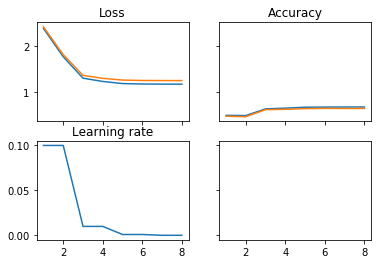

In [5]:
def plot():
    import matplotlib.pyplot as plt
    t = np.arange(1, len(learning_rates) + 1)
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
        2, 2, sharex='col', sharey='row')
    ax1.set_title("Loss")
    ax1.plot(t, train_losses, label="training")
    ax1.plot(t, valid_losses, label="validation")
    ax2.set_title("Accuracy")
    ax2.plot(t, train_accuracies, label="training")
    ax2.plot(t, valid_accuracies, label="validation")
    ax3.set_title("Learning rate")
    ax3.plot(t, learning_rates)
    #ax4.title("Learning rate")
    #ax4.plot(t, learning_rates)
    plt.show()


plot()

probs=nn.predict...
ind = np.argpartition...
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  1.  0.  0.]]
draw...


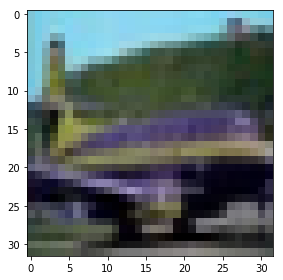

[(8, 0.0070226425), (1, 0.080519319), (9, 0.90852368)]
0 0.0025260229595


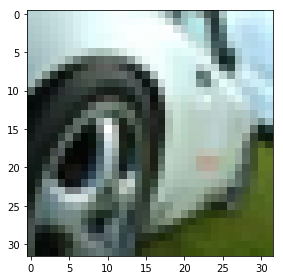

[(3, 0.013099805), (7, 0.15647848), (9, 0.80920738)]
1 0.00245133647695


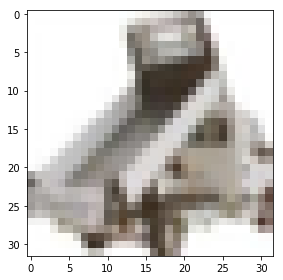

[(0, 0.17741261), (2, 0.44827607), (3, 0.24329183)]
9 0.00198007584549


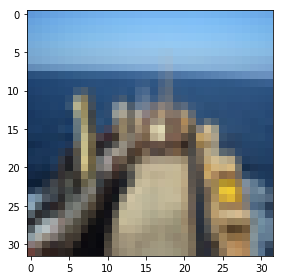

[(0, 0.035447396), (7, 0.70265919), (4, 0.19052781)]
8 0.00205321237445


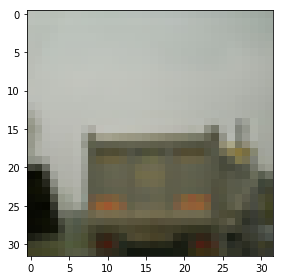

[(2, 0.012273228), (0, 0.05145245), (8, 0.90646672)]
9 0.00185978459194


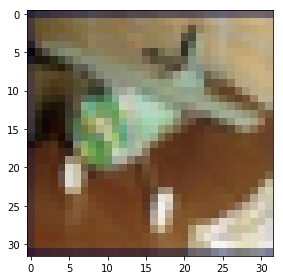

[(5, 0.03110392), (3, 0.08949548), (6, 0.82007724)]
0 0.00189576682169


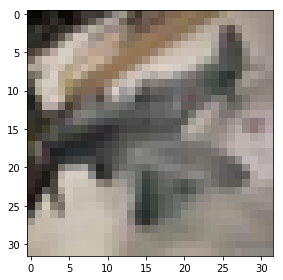

[(3, 0.14416282), (5, 0.33576202), (6, 0.26857677)]
0 0.00223876116797


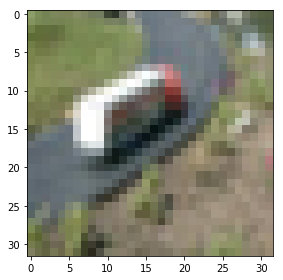

[(7, 0.039165623), (2, 0.68620282), (5, 0.18653139)]
9 0.00168407405727


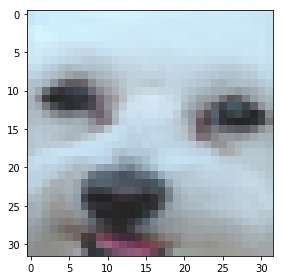

[(2, 0.025400197), (8, 0.45302087), (0, 0.49153078)]
5 0.00175352126826


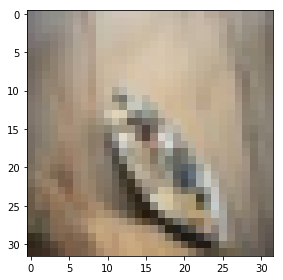

[(6, 0.17638206), (3, 0.19663955), (5, 0.3150554)]
8 0.00213643396273


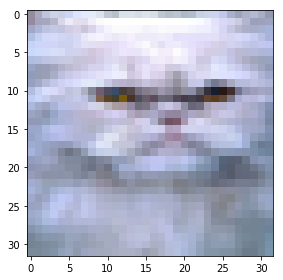

[(1, 0.027680097), (8, 0.36040884), (0, 0.59116066)]
3 0.00201592571102


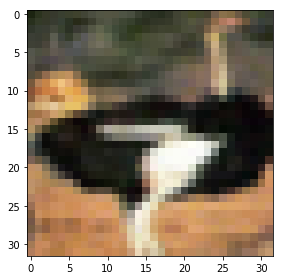

[(0, 0.0093614552), (1, 0.94925457), (4, 0.02566072)]
2 0.00252082850784


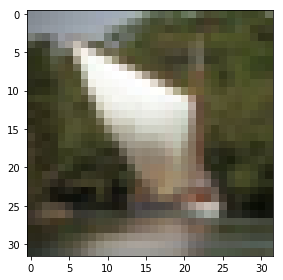

[(3, 0.085994013), (2, 0.49548179), (7, 0.27496126)]
8 0.00165149092209


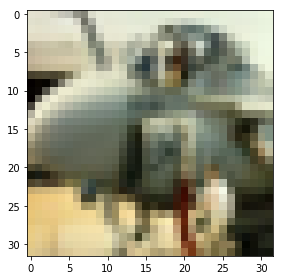

[(9, 0.017814351), (7, 0.8869856), (4, 0.032515716)]
0 0.00143877323717


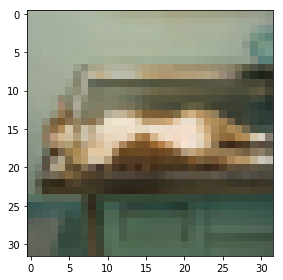

[(1, 0.060340289), (8, 0.25336277), (0, 0.62939483)]
3 0.000751641404349


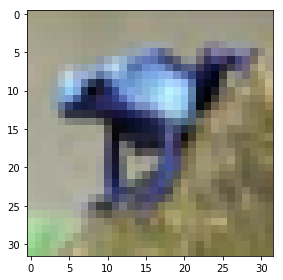

[(7, 0.15742473), (2, 0.46050224), (0, 0.30329078)]
6 0.00100894051138


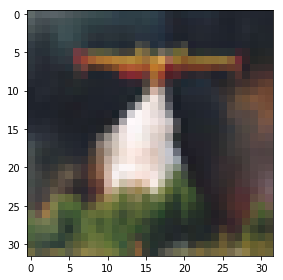

[(7, 0.074511774), (3, 0.12795787), (5, 0.72953075)]
0 0.000923855754081


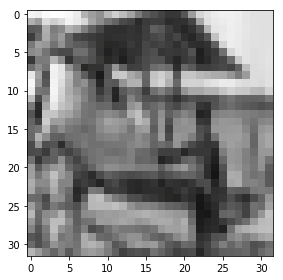

[(1, 0.011022637), (7, 0.026810046), (9, 0.94613981)]
0 0.001278326381


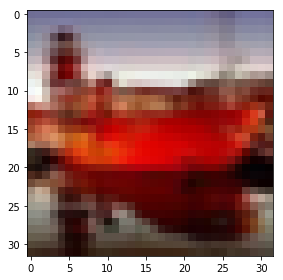

[(0, 0.0017008343), (1, 0.87608457), (9, 0.12077341)]
8 0.00139237276744


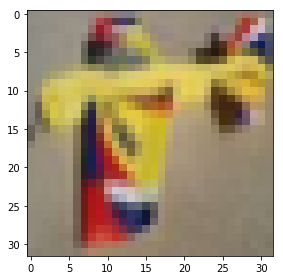

[(3, 0.12020365), (5, 0.13769282), (6, 0.58409703)]
0 0.00098385498859


In [6]:
def show_worst_results():
    print("probs=nn.predict...")
    probs = nn.predict(test_x)
    target_probs = np.sum(probs * test_y, axis=1)
    losses = -np.log(target_probs + 1e-9)
    print("ind = np.argpartition...")
    ind = np.argpartition(losses, -20)[-20:]
    print("draw...")
    for i in ind:
        draw_image(test_x[i], mean, std)
        top = np.argpartition(probs[i], -3)[-3:]
        print(list(zip(top, probs[i][top])))
        print(np.argmax(test_y[i]), target_probs[i])

show_worst_results()

In [7]:
a = np.array([1,2,4,8,5,3,6,9,4,2,3])
b = np.argpartition(a, -3)
c=a[b[-3:]]
a[b]

array([2, 1, 2, 3, 4, 3, 4, 5, 6, 8, 9])